# Baseball Case Study

# Problem Statement:

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.

# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset

In [2]:
df = pd.read_csv("Baseball.csv")
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


# Feature column data type and target / label ('W') data type indicate that both independent and dependent variable data are continuous in nature.


 - Input features:
        
Runs R: number of times a player crosses home plate

At Bats AB: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction

Hits: reaching base because of a batted, fair ball without error by the defense

Doubles: hits on which the batter reaches second base safely without the contribution of a fielding error

Triples: hits on which the batter reaches third base safely without the contribution of a fielding error

Homeruns: hits on which the batter successfully touched all four bases, without the contribution of a fielding error

Walks: times pitching four balls, allowing the batter to take first base / hitter not swinging at four pitches called out of the strike zone and awarded first base.

Strikeouts: number of batters who received strike three

Stolen Bases: number of bases advanced by the runner while the ball is in the possession of the defense

Runs Allowed: the number of runs scored against a pitcher. This includes earned runs and unearned runs.

Earned Runs: number of runs that did not occur as a result of errors or passed balls

Earned Run Average (ERA): the average number of earned runs allowed by a pitcher per nine innings

Shutouts: number of complete games pitched with no runs allowed

Saves: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings

Complete Games: number of games where player was the only pitcher for their team

Errors: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result

 - Output:
    
Number of predicted wins (W)

In [3]:
df.shape

(30, 17)

In [4]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

Checking for null/missing values

In [5]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

<AxesSubplot:>

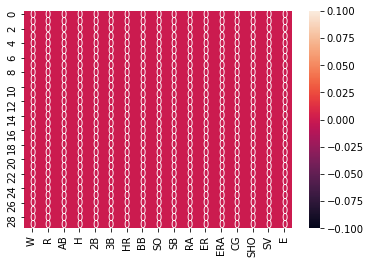

In [7]:
sns.heatmap(df.isnull() , annot =True)

In [8]:
#From the above observation wa can say that there is no missing values in our dataset.

# Statistical Summary

In [9]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [11]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [12]:
#Mean and 50% of all columns are similar.

#The mean is more than median for AB, H, HR, CG, SV and E columns.

# Checking for unique elements

In [13]:
df.nunique()

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

# This is a Regression Problem since the Target variable / Label column ("W") has Continuous type of Data.

# Interpreting Relationship between Dependent and Independent Variables

# Analysing the Target Variable

<AxesSubplot:xlabel='W', ylabel='count'>

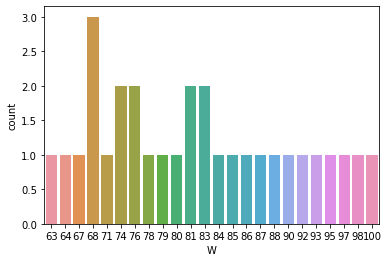

In [14]:
sns.countplot(df.W)

 - Team has got 68 number of wins thrice.

 - Minimum number of wins is 63.

 - Maximum number of wins is 100.

 - Team has got 74, 76, 81 and 83 number of wins twice.

 - Rest of the number of wins has got by team only once.

<AxesSubplot:xlabel='W', ylabel='Density'>

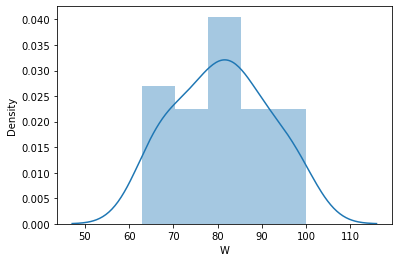

In [15]:
sns.distplot(df.W)

From the graph above it is observed that the 'W' data forms a continuous Normal distribution with mean of 80.966.

In [16]:
df.W.skew()

0.047088688953686085

# Analysing the Feature Columns

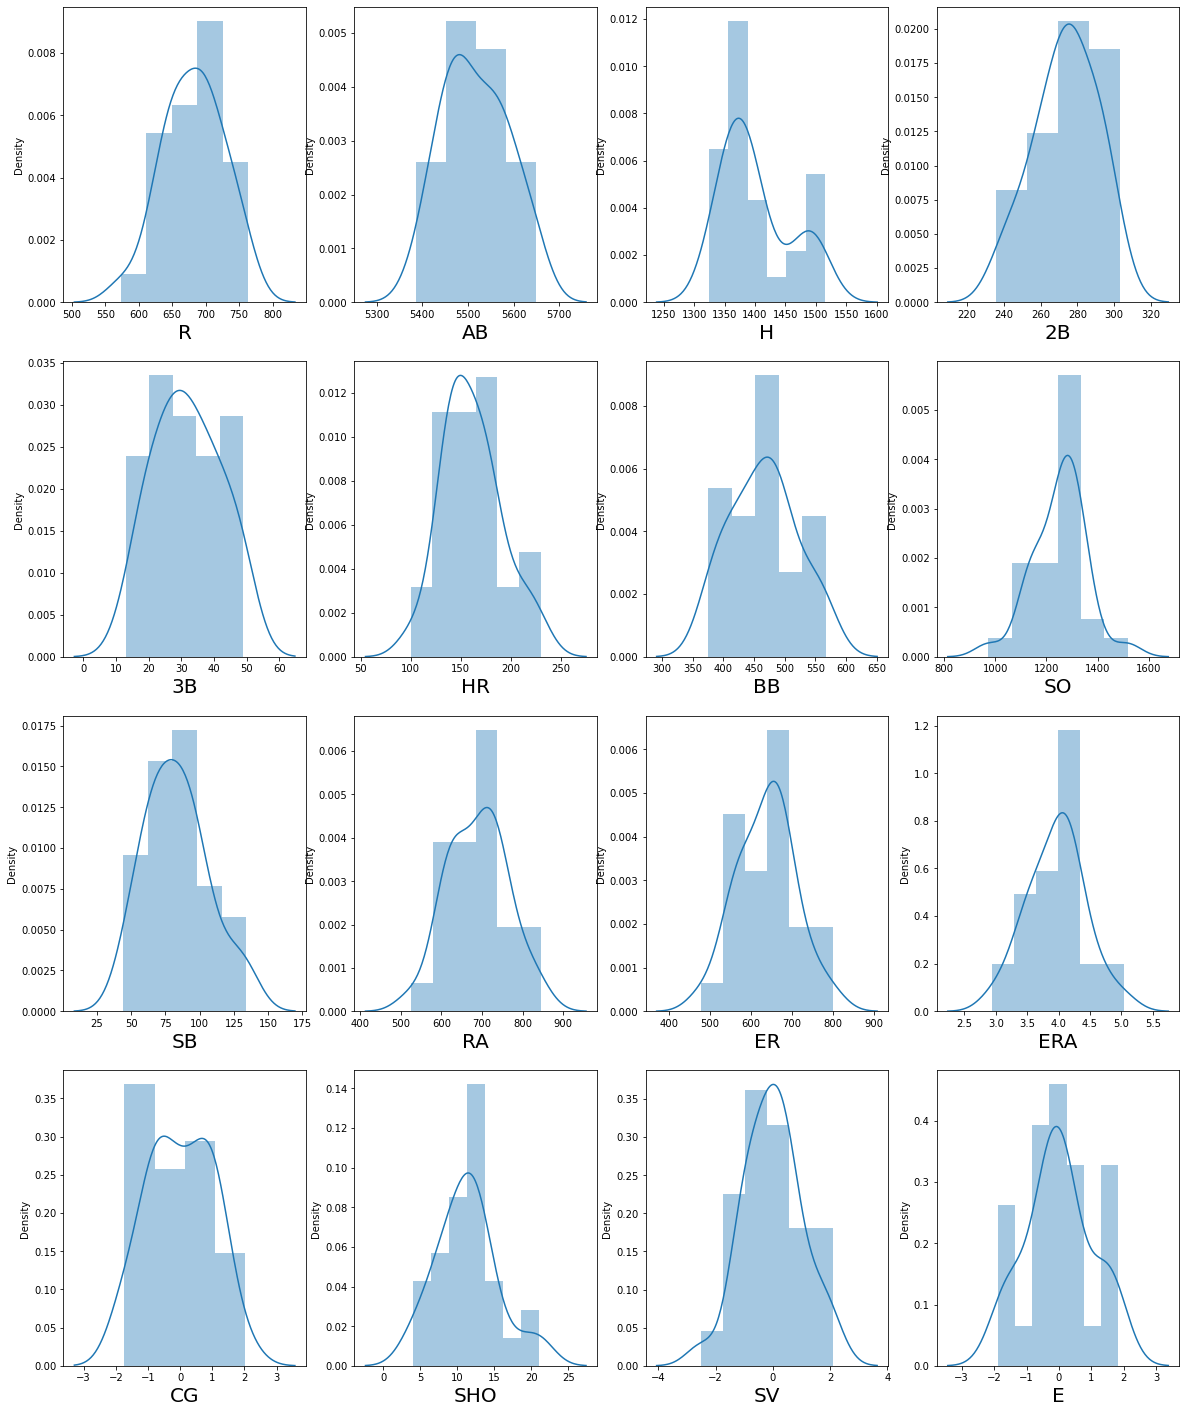

In [64]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in df.drop(columns=['W']):
    if plotnum<=16:
        plt.subplot(4,4,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

 - It can be observed from above graphs that data is mostly normally distributed.


 - Data in columns like R, CG, E, SV,H are skewed.

# Checking Skewness

In [20]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

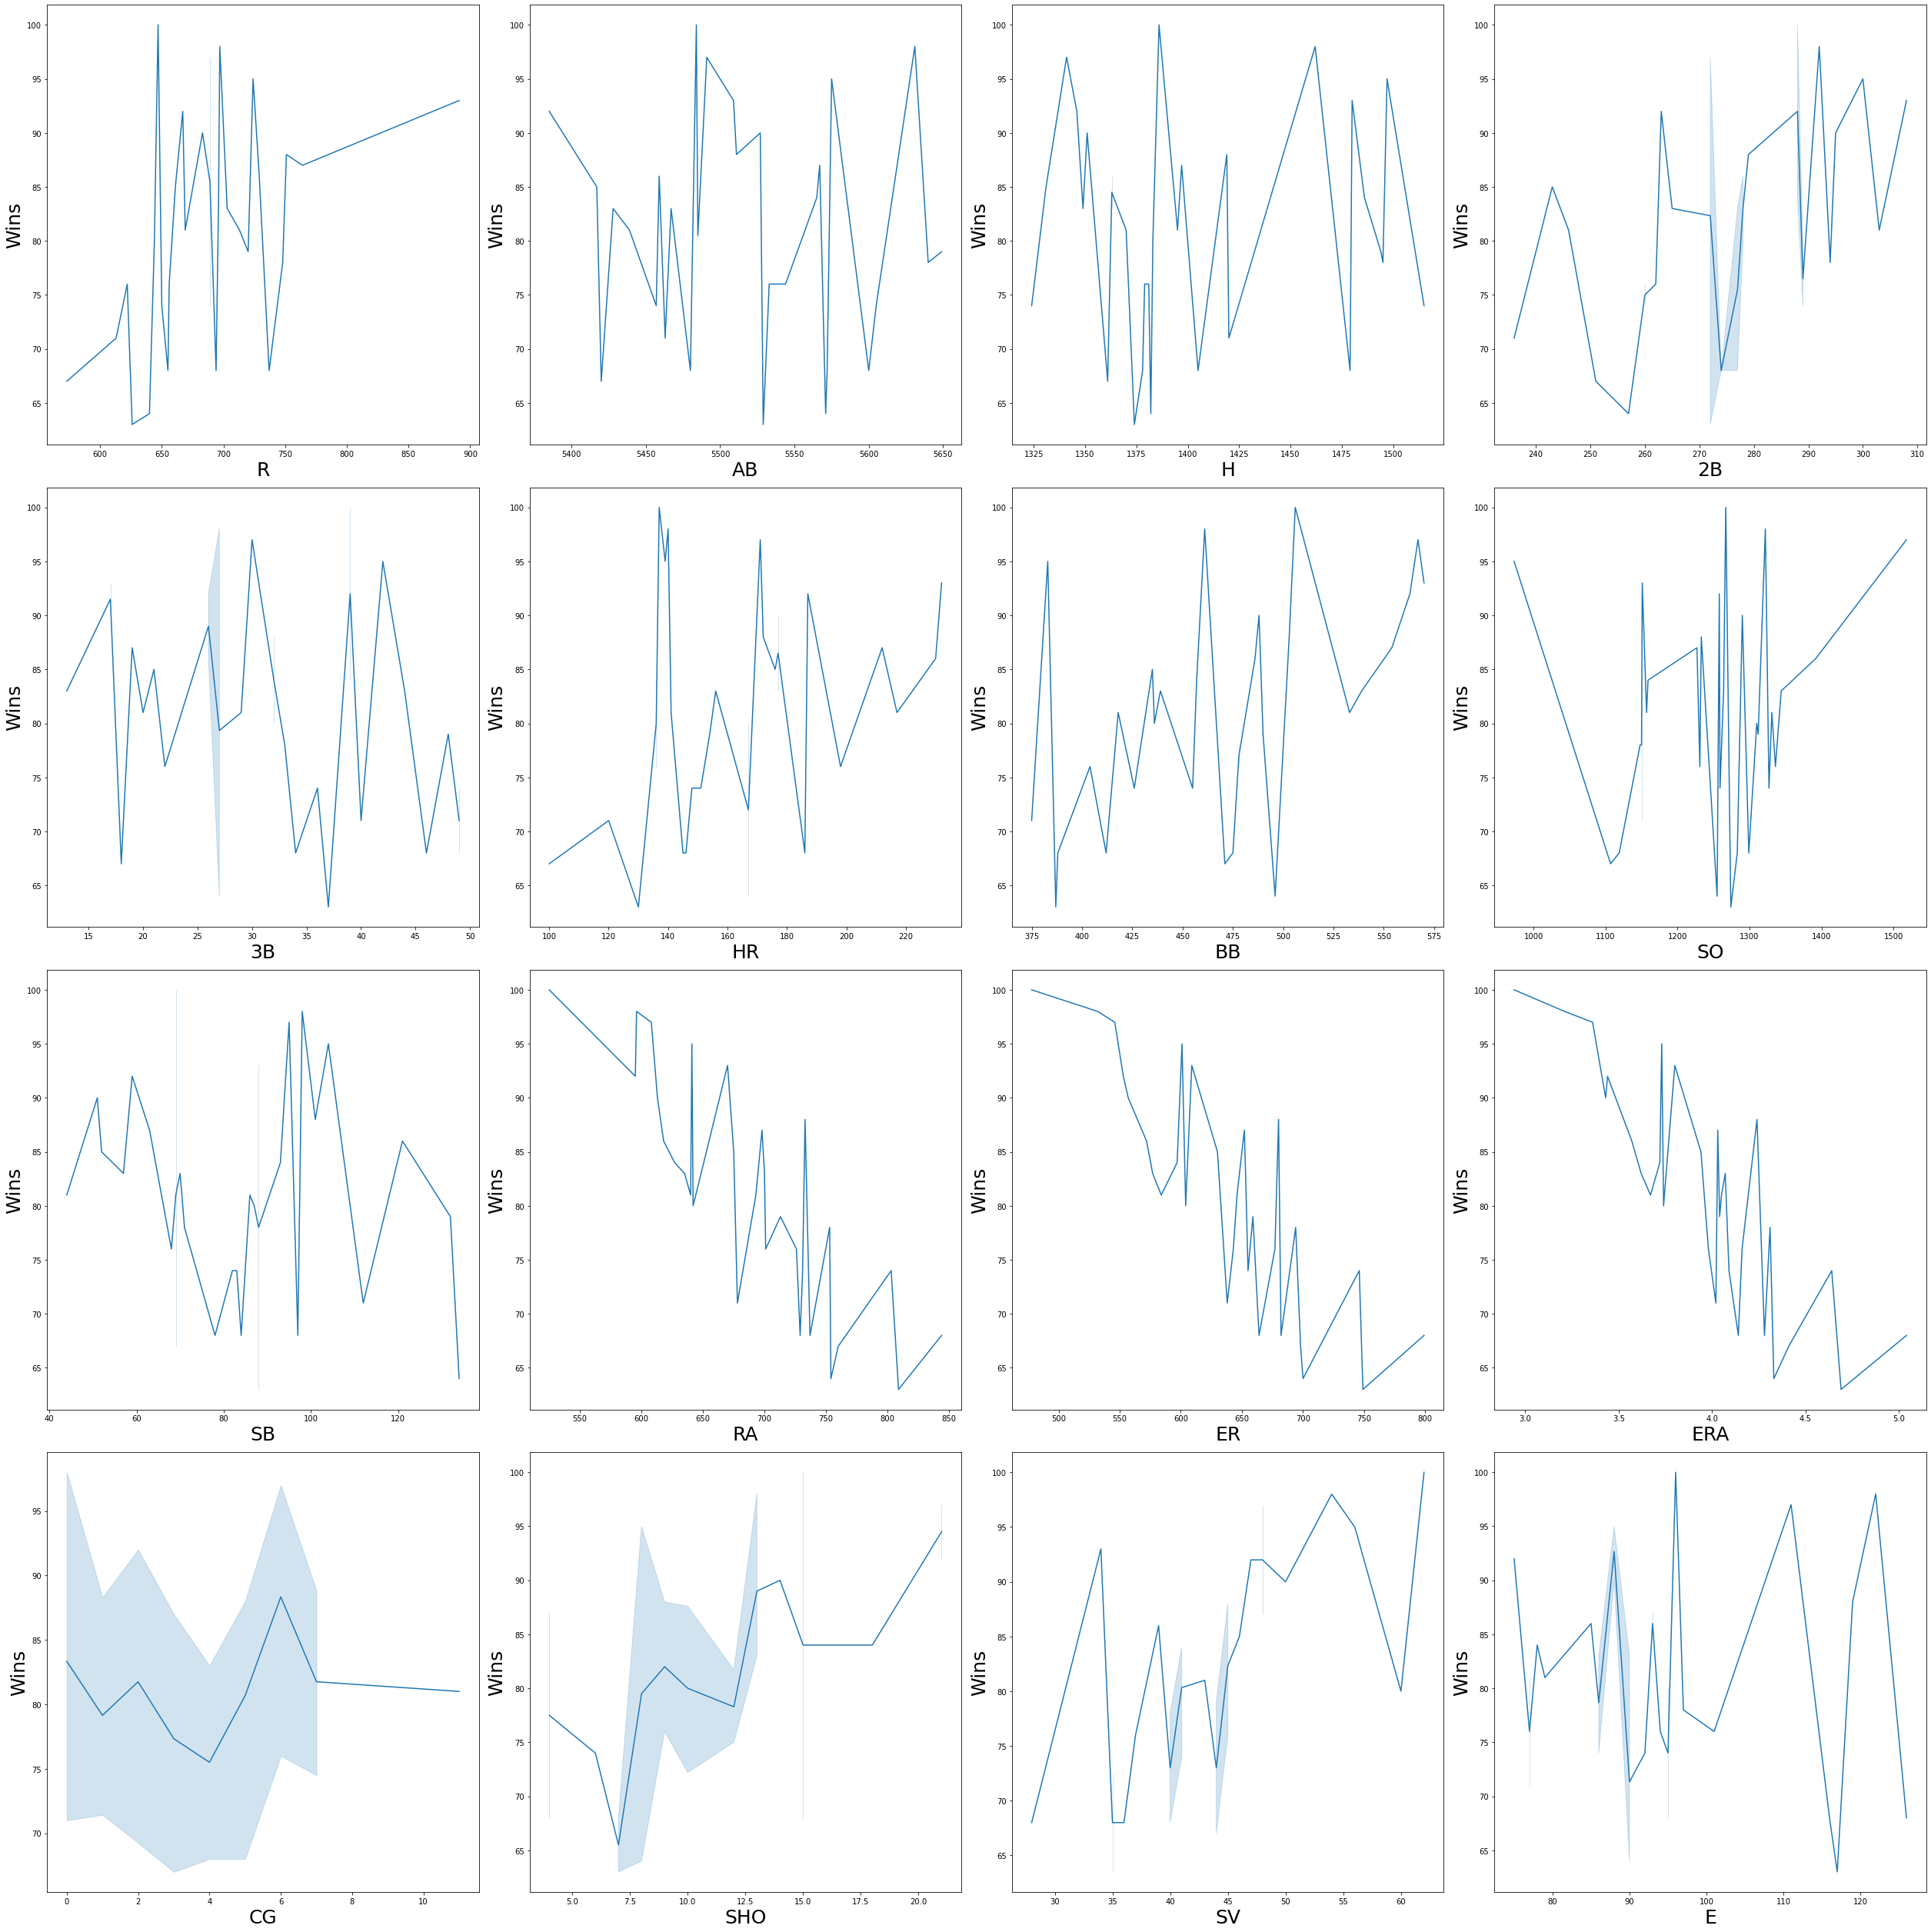

In [23]:
plt.figure(figsize=(35,35),facecolor='white')
plotnum=1
X  = df.drop(columns=['W'])
y = df['W']
for col in X:
    if plotnum<=16:
        plt.subplot(4,4,plotnum)
        sns.lineplot(X[col],y)
        plt.xlabel(col,fontsize=25)
        plt.ylabel('Wins',fontsize=25)
    plotnum+=1
plt.tight_layout()

 - From the above sets of graph we can see that R,2B,HR,BB,SV,SHO have postively linear relationship with wins, and RA(Runs allowed),ER(Earned Runs),ERA(Earned Runs average) have negative liner realtionship with wins

In [24]:
col = ['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'E']

<Figure size 720x576 with 0 Axes>

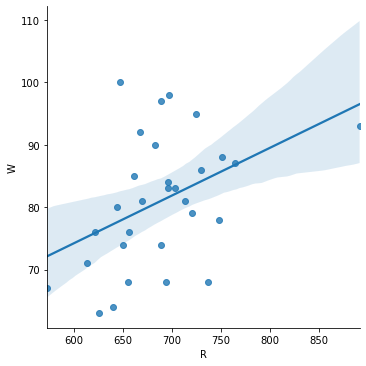

<Figure size 720x576 with 0 Axes>

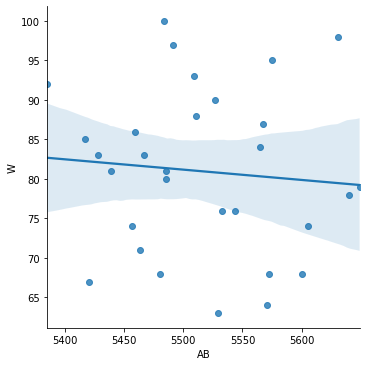

<Figure size 720x576 with 0 Axes>

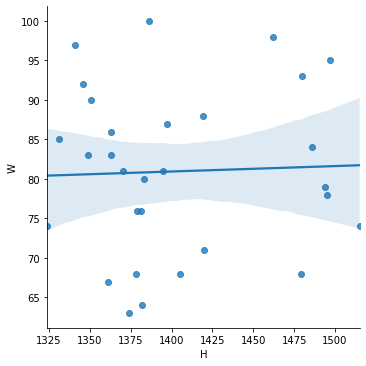

<Figure size 720x576 with 0 Axes>

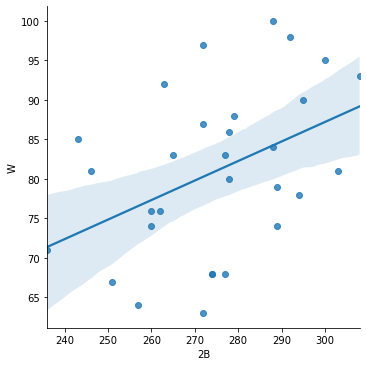

<Figure size 720x576 with 0 Axes>

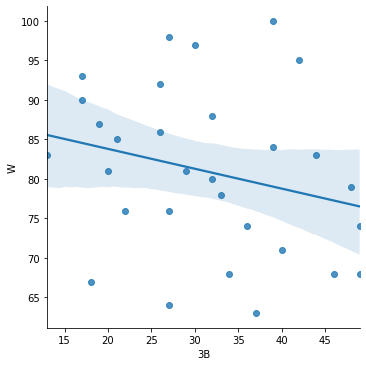

<Figure size 720x576 with 0 Axes>

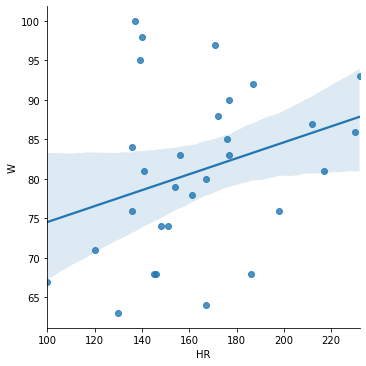

<Figure size 720x576 with 0 Axes>

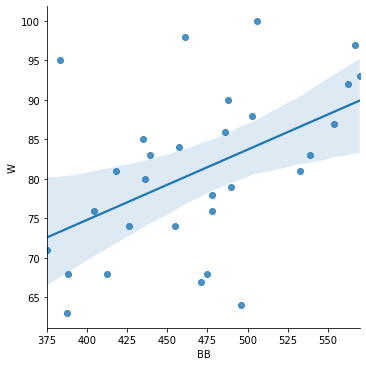

<Figure size 720x576 with 0 Axes>

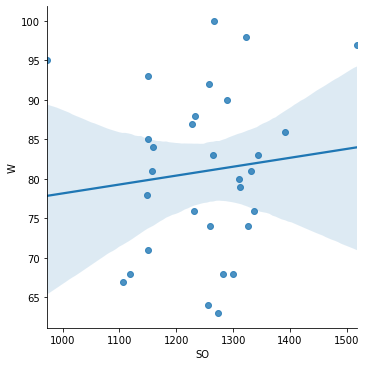

<Figure size 720x576 with 0 Axes>

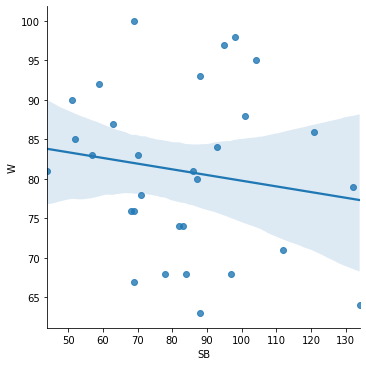

<Figure size 720x576 with 0 Axes>

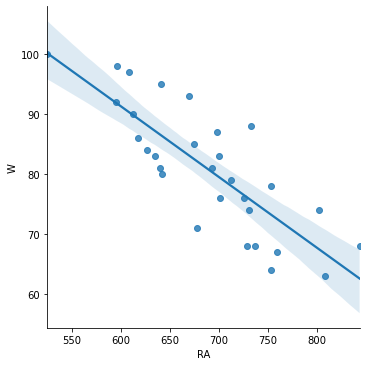

<Figure size 720x576 with 0 Axes>

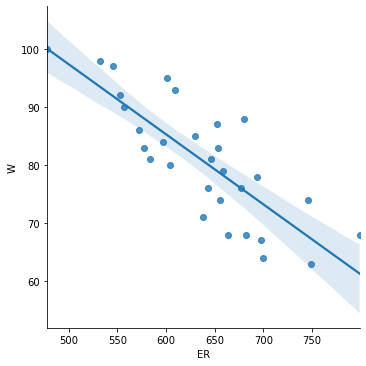

<Figure size 720x576 with 0 Axes>

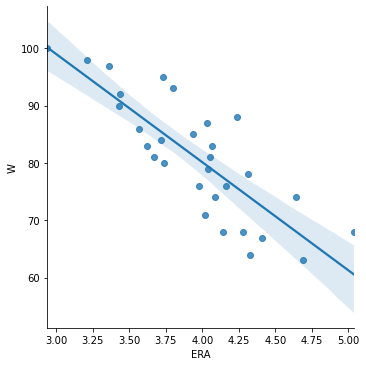

<Figure size 720x576 with 0 Axes>

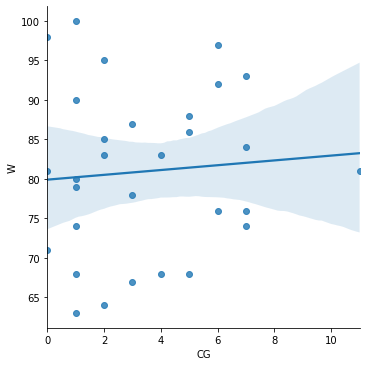

<Figure size 720x576 with 0 Axes>

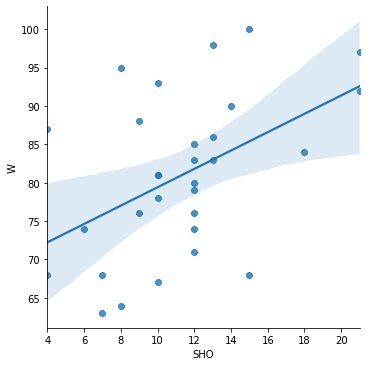

<Figure size 720x576 with 0 Axes>

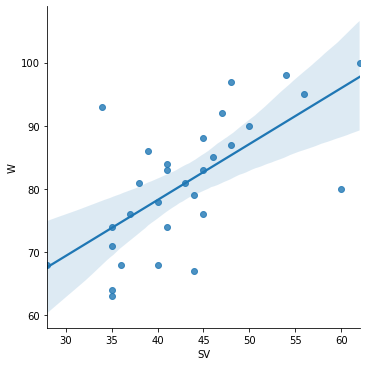

<Figure size 720x576 with 0 Axes>

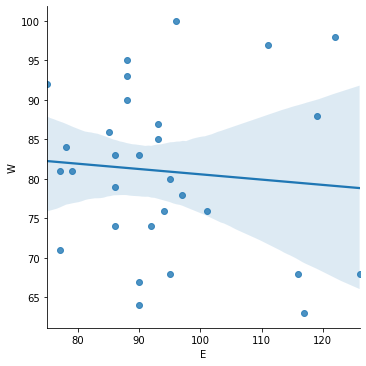

In [25]:
for i in col:
    plt.figure(figsize=(10,8))
    sns.lmplot(x=i,y='W', data= df)
    plt.show()

 - Only 'SV' has decent positive correlation while others have negative correlation

# Checking for Outliers

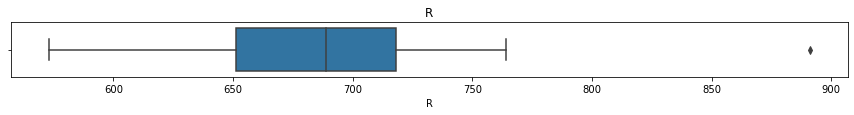

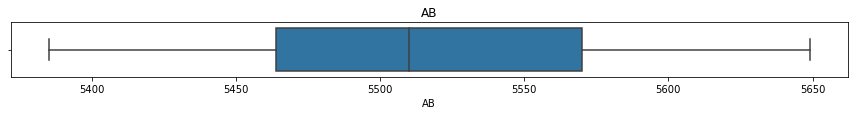

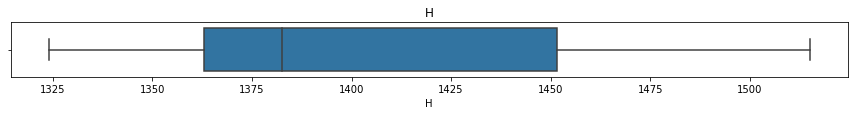

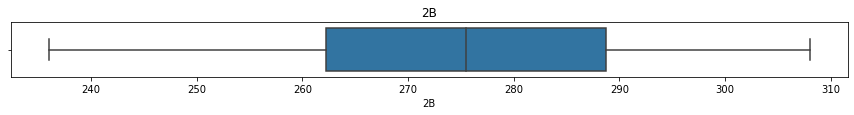

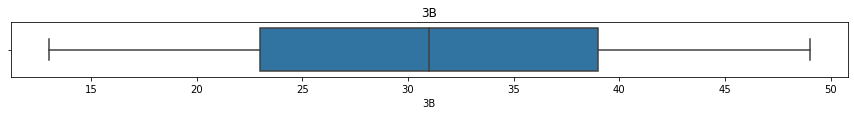

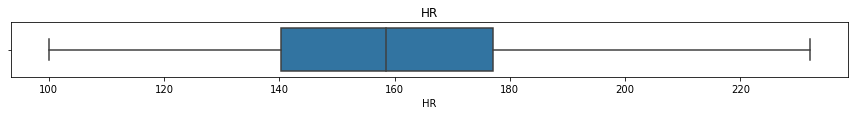

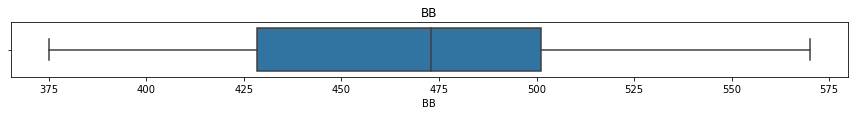

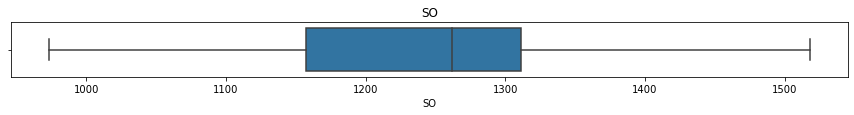

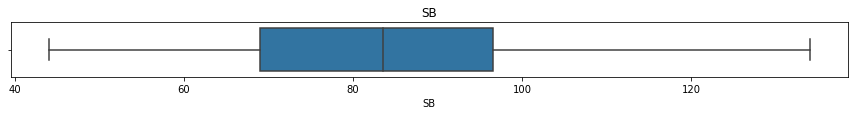

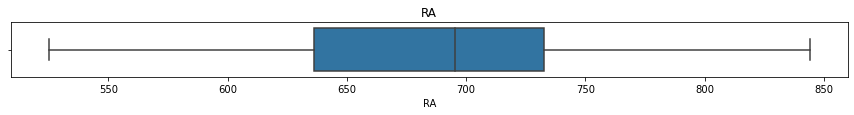

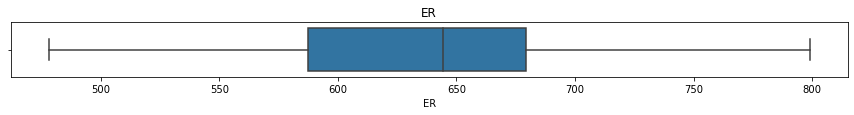

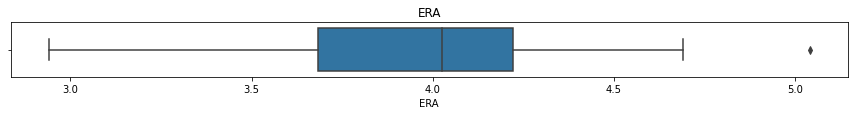

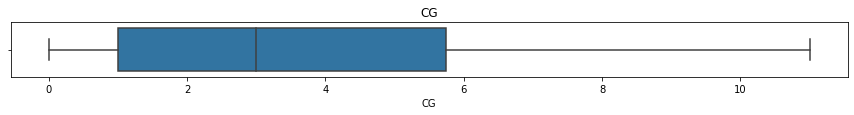

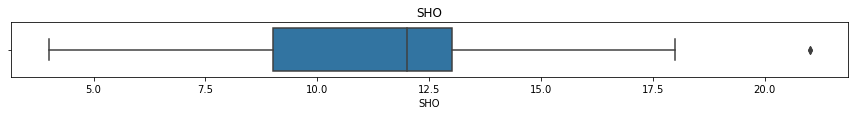

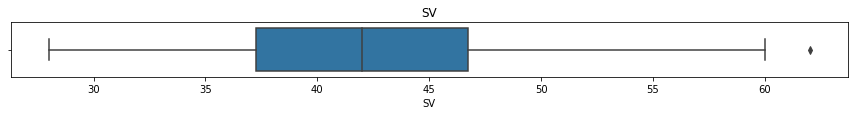

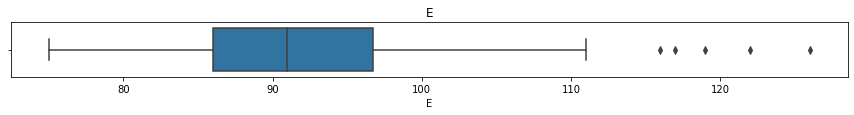

In [26]:
col = ['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'E']
for i in col:
    plt.figure(figsize=(15,1))
    plt.title(i)
    sns.boxplot(df[i])
    plt.show()

 - Columns 'R', 'SHO', 'SV', 'ERA' and 'E' have outliers present.

# Removing Outliers using Z score Method

In [28]:
z = np.abs(zscore(df))
z

array([[1.36540860e+00, 6.19077968e-01, 8.47731264e-01, 1.66368512e+00,
        1.42017307e+00, 1.04119304e+00, 7.87298598e-01, 1.53490242e+00,
        2.69762957e+00, 9.13883291e-01, 6.66233927e-01, 5.05110079e-01,
        5.06955186e-01, 5.39806195e-01, 8.14628593e-01, 1.67160651e+00,
        4.61469635e-01],
       [1.97838300e-01, 1.34431656e-01, 7.11093535e-01, 9.70680764e-01,
        1.27403389e-01, 1.23580856e+00, 2.43966683e-01, 5.36591904e-01,
        1.54878442e-01, 6.01825582e-01, 1.65970766e-01, 2.48929848e-01,
        2.54597523e-01, 5.39806195e-01, 1.72800005e-01, 2.49879323e-01,
        6.07196888e-01],
       [3.24325082e-03, 3.32905860e-01, 1.11523330e+00, 1.51891367e-01,
        1.58879521e+00, 2.23807850e-01, 7.23377196e-01, 1.13914361e+00,
        8.93981893e-01, 1.11449182e-01, 6.80339091e-01, 7.51623132e-01,
        6.41346840e-01, 2.77264091e+00, 3.20914294e-01, 6.54856158e-01,
        1.11724227e+00],
       [4.83244373e-01, 1.14641931e+00, 2.41521620e-01, 4.010

In [30]:
threshold=3
df_new=df[(z<3).all(axis=1)]

In [31]:
df.shape

(30, 17)

In [32]:
df_new.shape

(29, 17)

 - 1 row is removed as outliers

# % Data Loss

In [33]:
loss = (30-29)/30*100
loss

3.3333333333333335

# 3.33% Data loss is within acceptable range.

In [34]:
df = df_new

In [35]:
df.shape

(29, 17)

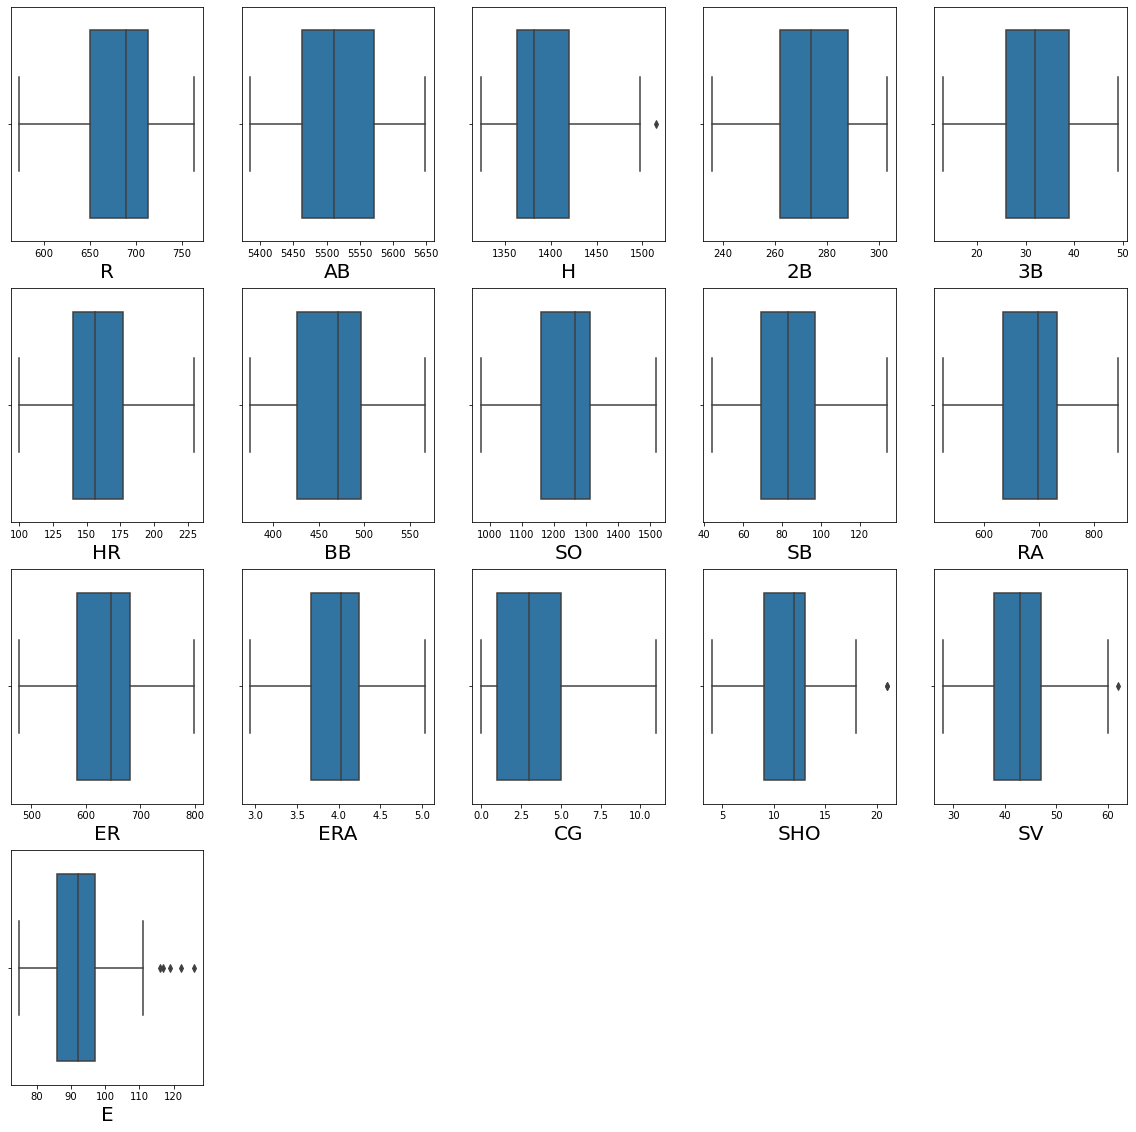

In [36]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in df.drop(columns = ['W'],axis=1):
    if plotnum<=16:
        plt.subplot(5,5,plotnum)
        sns.boxplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

 - Some amount of outliers has been removed

# Checking for Skewness

In [37]:
df.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

 - There is moderate skewness in E, CG, H, and SV.

# Finding Correlation

In [38]:
t_corr = df.corr()
t_corr

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.390451,-0.085780,-0.018360,0.384886,-0.206737,0.245697,0.447513,0.156469,-0.169503,-0.823176,-0.815308,-0.826952,0.029594,0.497526,0.749290,-0.072858
R,0.390451,1.000000,0.438022,0.433525,0.469293,0.134204,0.586894,0.258450,0.081158,0.075323,-0.013858,0.007727,-0.009122,0.101438,-0.085108,0.061381,0.043123
AB,-0.085780,0.438022,1.000000,0.769159,0.490752,0.445604,-0.064653,-0.137850,-0.111243,0.373674,0.315499,0.309146,0.254872,-0.078511,-0.198872,-0.113342,0.316297
H,-0.018360,0.433525,0.769159,1.000000,0.528016,0.582024,-0.218711,-0.222271,-0.371861,0.417877,0.244606,0.280571,0.256458,0.092577,-0.135116,-0.079814,-0.011945
2B,0.384886,0.469293,0.490752,0.528016,1.000000,0.342419,-0.098695,0.211243,-0.096772,0.194308,-0.215196,-0.224993,-0.248212,0.244856,0.084060,0.269999,0.145032
3B,-0.206737,0.134204,0.445604,0.582024,0.342419,1.000000,-0.369299,-0.404852,-0.196586,0.483818,0.312750,0.333731,0.325883,-0.003733,-0.058896,-0.210627,0.108610
HR,0.245697,0.586894,-0.064653,-0.218711,-0.098695,-0.369299,1.000000,0.336814,0.479914,-0.166072,-0.092586,-0.062094,-0.070756,0.065978,0.005546,0.066984,-0.189790
BB,0.447513,0.258450,-0.137850,-0.222271,0.211243,-0.404852,0.336814,1.000000,0.315566,-0.117622,-0.425381,-0.455832,-0.465794,0.417437,0.473922,0.187101,-0.050114
SO,0.156469,0.081158,-0.111243,-0.371861,-0.096772,-0.196586,0.479914,0.315566,1.000000,0.038188,-0.140570,-0.177655,-0.195362,-0.053075,0.231230,0.091394,0.142740
SB,-0.169503,0.075323,0.373674,0.417877,0.194308,0.483818,-0.166072,-0.117622,0.038188,1.000000,0.134315,0.146243,0.128848,-0.030708,-0.104602,-0.179741,0.082702


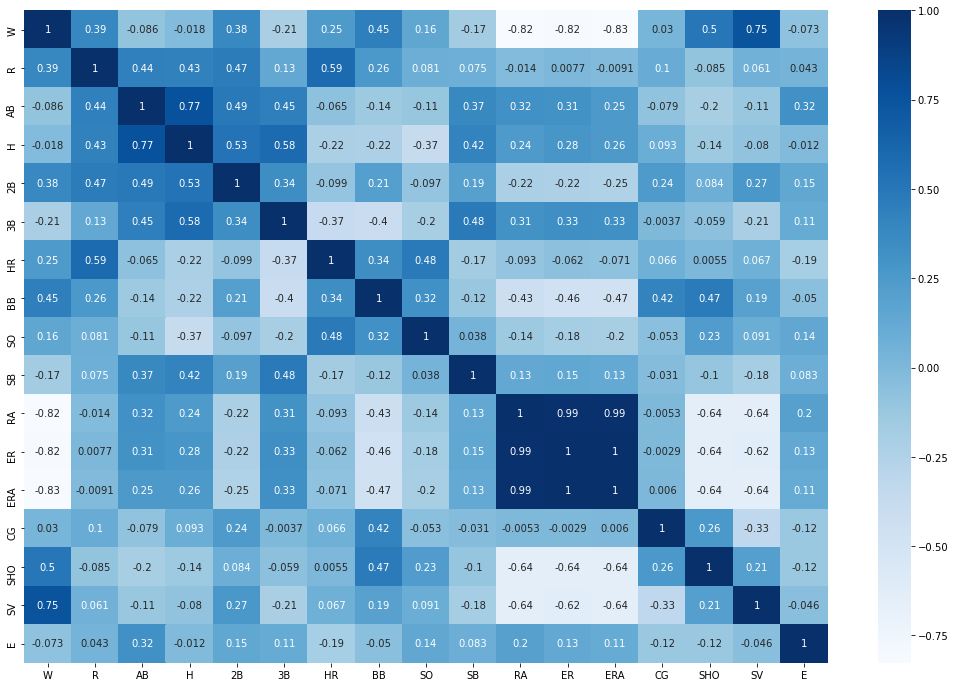

In [39]:
plt.figure(figsize=(18,12))
sns.heatmap(t_corr,annot=True,cmap='Blues')
plt.show()

# Heat plot shows that:

 - ER, RA and ERA features are highly correlated among each other (almost 1)

 - ER, RA and ERA features have strong negative correlation with respect to wins (W) (0.82)

 - SV has decent correlation with W (Win) (0.75)

# Visualising correlation of Feature columns with Label column

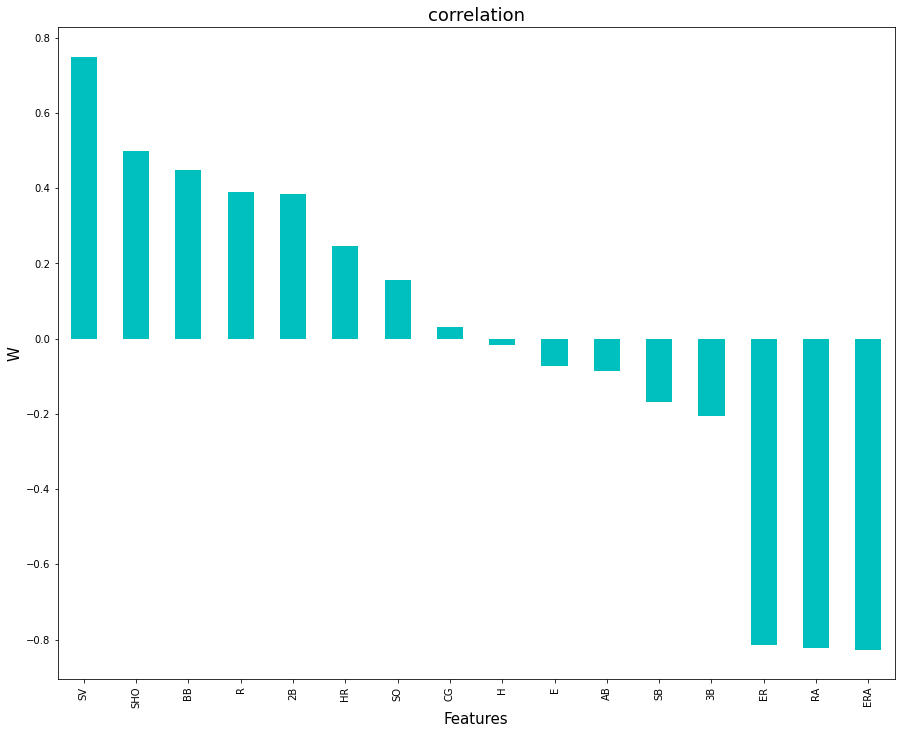

In [40]:
plt.figure(figsize=(15,12))
df.corr()['W'].sort_values(ascending=False).drop(['W']).plot(kind='bar', color='c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('W',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

 - SV has the highest positive correlation with W followed by SHO and BB. While, ER,ERA and RA have the highest negative correlation wiht W. H has the weakest correlation with W.

# Normalizing Data Distribution using PowerTransformer

In [42]:
from sklearn.preprocessing import PowerTransformer

In [43]:
powtrans= PowerTransformer(method='yeo-johnson', standardize=True)

In [44]:
skewed = ['E','CG','SV']

In [45]:
df1 = df[skewed].copy()

In [46]:
df1

,E,CG,SV
0,88,2,56
1,86,2,45
2,79,11,38
3,101,7,37
4,86,7,35
6,93,3,48
7,77,0,43
8,95,1,60
9,97,3,40
10,119,5,45


In [47]:
(df==0).sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     3
SHO    0
SV     0
E      0
dtype: int64

In [48]:
transformed= powtrans.fit_transform(df1)

In [49]:
type(transformed)

numpy.ndarray

In [50]:
transformed = pd.DataFrame(transformed, columns=df1.columns) #to convert numpy array back into dataframe

In [51]:
transformed.skew()

E     0.065585
CG   -0.045947
SV   -0.000925
dtype: float64

In [52]:
(transformed==0).sum()

E     0
CG    0
SV    0
dtype: int64

In [53]:
transformed.index = df.index

In [54]:
df[skewed] = transformed[skewed]

In [55]:
df.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.045947
SHO    0.526943
SV    -0.000925
E      0.065585
dtype: float64

In [56]:
df.shape

(29, 17)

 - A lot of skewness has been removed.

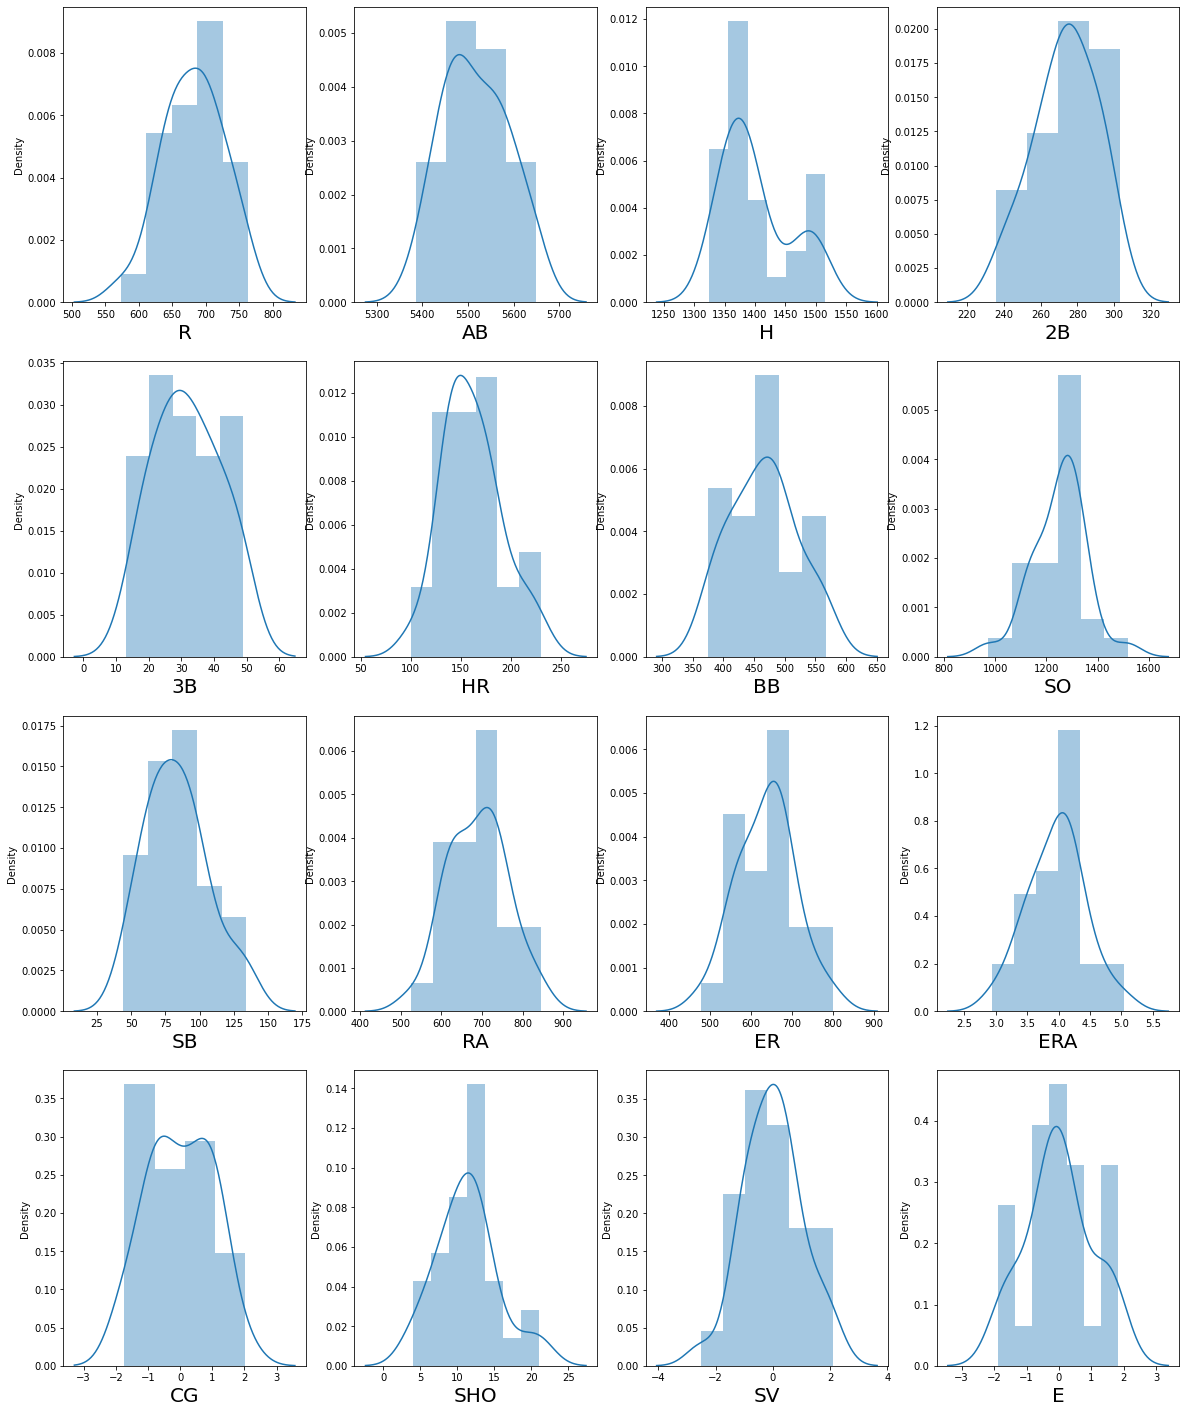

In [59]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in df.drop(columns=['W']):
    if plotnum<=16:
        plt.subplot(4,4,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

Data Distribution looks much more normalised now.

# Feature Selection

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
X =df.drop(columns=['W'])
y =df['W']

In [62]:
scaler= StandardScaler()

In [63]:
scaled_X = scaler.fit_transform(X)

# Checking for Multicollinearity using Variance Inflation Factor

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [66]:
vif = pd.DataFrame()

In [67]:
vif["Features"] = X.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]

In [68]:
vif

,Features,vif
0,R,7.145507
1,AB,20.045249
2,H,10.070847
3,2B,3.617255
4,3B,3.351744
5,HR,8.763664
6,BB,3.478298
7,SO,2.896642
8,SB,1.985509
9,RA,202.458023


# R,ER and ERA have the highest multicollinearity amongst all the features.

# Principle Component Analysis

In [69]:
from sklearn.decomposition import PCA

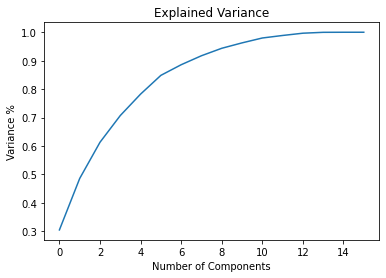

In [70]:
pca = PCA()
principleComponents = pca.fit_transform(scaled_X)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained Variance')
plt.show()

 - 14 components explain around 95% variance in Data

In [71]:
pca = PCA(n_components=14)
new_comp = pca.fit_transform(scaled_X)
principle_x=pd.DataFrame(new_comp,columns=np.arange(14))

In [72]:
principle_x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.083823,-2.920609,2.404411,-0.519192,-2.321222,-0.363228,0.801997,0.567603,0.669809,0.553509,0.609912,-0.237115,-0.142374,0.156116
1,0.040239,0.441891,0.307842,-0.028394,-0.301015,0.383767,-0.928506,1.403832,0.094520,0.118770,-0.717897,-0.277762,-0.047386,0.531173
2,-1.193819,-0.797624,0.127786,2.706134,-0.639873,-0.688634,1.477931,1.007298,0.076831,-1.211474,-0.329547,0.128500,0.054950,-0.122480
3,0.726536,1.464451,0.666725,0.743334,0.526002,-1.123210,-0.122907,-0.254285,0.381915,-0.586572,1.390158,0.143165,0.797181,0.268029
4,3.433005,-1.466989,-0.694311,1.676540,0.015659,0.233655,-1.137787,0.194456,-1.156522,-0.276122,0.114767,0.158575,0.118948,-0.316581
5,-0.349433,-0.354773,-2.819142,-1.204914,-1.684508,-1.049062,1.001475,-0.499151,-0.024055,0.251810,-0.613946,-0.077660,0.797618,0.026140
6,-0.833840,2.203214,-1.321381,-1.685617,-2.094846,1.419340,-1.255718,-0.646639,0.052447,-0.429191,-0.056212,0.177004,-0.033744,0.024824
7,-1.335585,0.054447,1.078886,-1.477306,0.182585,0.214306,0.025752,0.822445,-0.721766,0.362064,0.550002,-0.415113,-0.188529,-0.271990
8,2.157745,-2.052948,-0.914972,-0.012153,-1.098287,-1.181274,-0.470617,-0.839563,-0.209176,-0.080908,-0.329612,0.101535,-0.311042,0.017298
9,1.015355,-0.945705,-1.545605,-0.332017,0.422738,-0.917129,0.871394,0.495582,0.447687,1.213895,-0.137579,0.448252,-0.367028,0.076357


# Selecting Kbest Features

In [74]:
from sklearn.feature_selection import SelectKBest, f_classif

In [75]:
bestfeat = SelectKBest(score_func = f_classif, k = 16)
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [76]:
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(22,'Score'))

   Feature     Score
15       E  4.329879
8       SB  3.283197
9       RA  2.524616
0        R  2.485509
14      SV  1.764635
11     ERA  1.732208
10      ER  1.636442
1       AB  1.622586
7       SO  1.519889
13     SHO  1.253358
6       BB  0.943327
5       HR  0.818974
4       3B  0.811129
3       2B  0.799063
2        H  0.729450
12      CG  0.436693


 - Selecting best features based on their scores and dropping a highly colinear column 'ERA'.

In [77]:
x_best = X.drop(columns = ['ERA','CG']).copy() #dropping highly colinear feature and feature with lowest score

In [78]:
ss_x_best = scaler.fit_transform(x_best)

# The Data to be predicted in Target / Label column is continuous in nature since it is the number of Wins. Therefore Regression Models will be used.

# Regression Model Building

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Finding the Best Random State

In [80]:
from sklearn.linear_model import Lasso
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(ss_x_best,y,test_size = .23,random_state = i)
    modr =  Lasso()
    modr.fit(x_train,y_train)
    pred = modr.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.9535335084587393 on random_state: 82


In [81]:
x_train,x_test,y_train,y_test = train_test_split(ss_x_best,y,test_size = .23, random_state =82)

In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

In [83]:
from sklearn.metrics import r2_score,mean_squared_error

In [85]:
rf = RandomForestRegressor()
xg = XGBRegressor()
SV= SVR()
r=Ridge()
l = Lasso()
adb = AdaBoostRegressor()

# Training the Models

In [86]:
rf.fit(x_train,y_train)
xg.fit(x_train,y_train)
r.fit(x_train,y_train)
l.fit(x_train,y_train)
adb.fit(x_train,y_train)

AdaBoostRegressor()

All models have been trained.

# Ridge Regression Model

In [87]:
y_r_pred = r.predict(x_test)
r2_score(y_test,y_r_pred)

0.740080340619877

In [88]:
mean_squared_error(y_test,y_r_pred)

17.92915201438399

In [89]:
np.sqrt(mean_squared_error(y_test,y_r_pred))

4.234282939812123

# Lasso Regression Model

In [90]:
y_l_pred = l.predict(x_test)
r2_score(y_test,y_l_pred)

0.9535335084587393

In [91]:
mean_squared_error(y_test,y_l_pred)

3.2052396206012497

In [92]:
np.sqrt(mean_squared_error(y_test,y_l_pred))

1.7903183014763742

# Random Forest Regression Model

In [93]:
y_rf_pred = rf.predict(x_test)
r2_score(y_test,y_rf_pred)

0.6145661242603548

In [94]:
mean_squared_error(y_test,y_rf_pred)

26.58707142857144

In [95]:
np.sqrt(mean_squared_error(y_test,y_rf_pred))

5.156265259717681

# XGB Regression Model

In [96]:
y_xg_pred = xg.predict(x_test)
r2_score(y_test,y_xg_pred)

0.6933053935036724

In [98]:
mean_squared_error(y_test,y_xg_pred)

21.155668774644646

In [100]:
np.sqrt(mean_squared_error(y_test,y_xg_pred))

4.5995291905416416

# AdaBoost Regression Model

In [101]:
y_adb_pred = adb.predict(x_test)
r2_score(y_test,y_adb_pred)

0.5124077820974675

In [102]:
mean_squared_error(y_test,y_adb_pred)

33.63391217368489

In [103]:
np.sqrt(mean_squared_error(y_test,y_adb_pred))

5.799475163640663

# Model Cross Validation

In [104]:
from sklearn.model_selection import ShuffleSplit,cross_val_score,KFold

# Ridge Regression

In [105]:
cross_val_score(r,ss_x_best,y, cv=4).mean()

0.553934442865905

# Lasso Regression

In [106]:
cross_val_score(l,ss_x_best,y,cv=4).mean()

0.7529016115079561

# Random Forest Regression

In [107]:
cross_val_score(rf,ss_x_best,y,cv=4).mean()

0.5296455931361738

# XGB Regression

In [108]:
cross_val_score(xg,ss_x_best,y,cv=4).mean()

0.3924562694370372

# AdaBoost Regression

In [109]:
cross_val_score(adb,ss_x_best,y,cv=4).mean()

0.5178296141728316

Based on comparing Accuracy Score results with Cross Validation results, it is determined that Lasso Regression is the best model. It also has the lowest Root Mean Squared Error score

# Hyper Parameter Tuning

# Lasso Regression

In [110]:
parameter = {'alpha':np.array([5,0.5,0.05,0.005,0.0005,1,0.1,0.01,0.001,0.0001,0]),'fit_intercept': [True,False],'normalize':[True,False],'max_iter':[1000,2000,3000],'random_state':np.arange(100),'selection':["cyclic","random"]}

In [111]:
GridCV = GridSearchCV(Lasso(),parameter,cv=5,n_jobs = -1,verbose = 1)

In [112]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 26400 candidates, totalling 132000 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([5.e+00, 5.e-01, 5.e-02, 5.e-03, 5.e-04, 1.e+00, 1.e-01, 1.e-02,
       1.e-03, 1.e-04, 0.e+00]),
                         'fit_intercept': [True, False],
                         'max_iter': [1000, 2000, 3000],
                         'normalize': [True, False],
                         'random_state': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'selection': ['cyclic', 'random']},
             verbose=1)

In [113]:
GridCV.best_params_

{'alpha': 1.0,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'random_state': 15,
 'selection': 'random'}

In [114]:
Best_mod = Lasso(alpha = 1, fit_intercept= True, normalize = False,max_iter = 1000, random_state = 15,selection ='random')

In [115]:
Best_mod.fit(x_train,y_train)

Lasso(alpha=1, normalize=False, random_state=15, selection='random')

In [116]:
lpred = Best_mod.predict(x_test)
acc = r2_score(y_test,lpred)
print(acc*100)

95.35279096387974


# Lasso Regression has an accuracy of 95.35%

# Saving The Model

In [117]:
import joblib
joblib.dump(Best_mod,"BestModelBaseball.pkl")

['BestModelBaseball.pkl']

# Loading The Model

In [118]:
mod=joblib.load("BestModelBaseball.pkl")

In [119]:
print(mod.predict(x_test))

[64.39376399 79.91093734 77.47769336 90.34134458 72.42438173 86.29169899
 85.29648827]


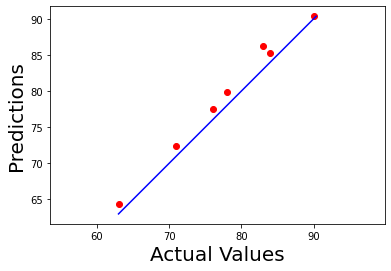

In [120]:
#plt.figure(figsize=(20,20))

plt.scatter(y_test, lpred, c='red')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(lpred), max(y_test))
p2 = min(min(lpred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=20)
plt.ylabel('Predictions', fontsize=20)
plt.axis('equal')
plt.show()